___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

This is a project I have done as a part of course in Python for Machine learning & AI by Jose Portilla on Udemy.In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We have the stock information for the following banks form 2006-2016:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo


In [47]:
#Import data from a pickle file 

bank_stocks = pd.read_pickle('/Users/sree/Documents/Python/Refactored_Py_DS_ML_Bootcamp-master/10-Data-Capstone-Projects/all_banks')
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [3]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Check the head of the bank_stocks dataframe.**

In [5]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [6]:
bank_stocks.xs(key = 'Close', axis = 1,level = 'Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [7]:
returns = pd.DataFrame()


** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [8]:
for tick in tickers:
    returns[tick + ' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

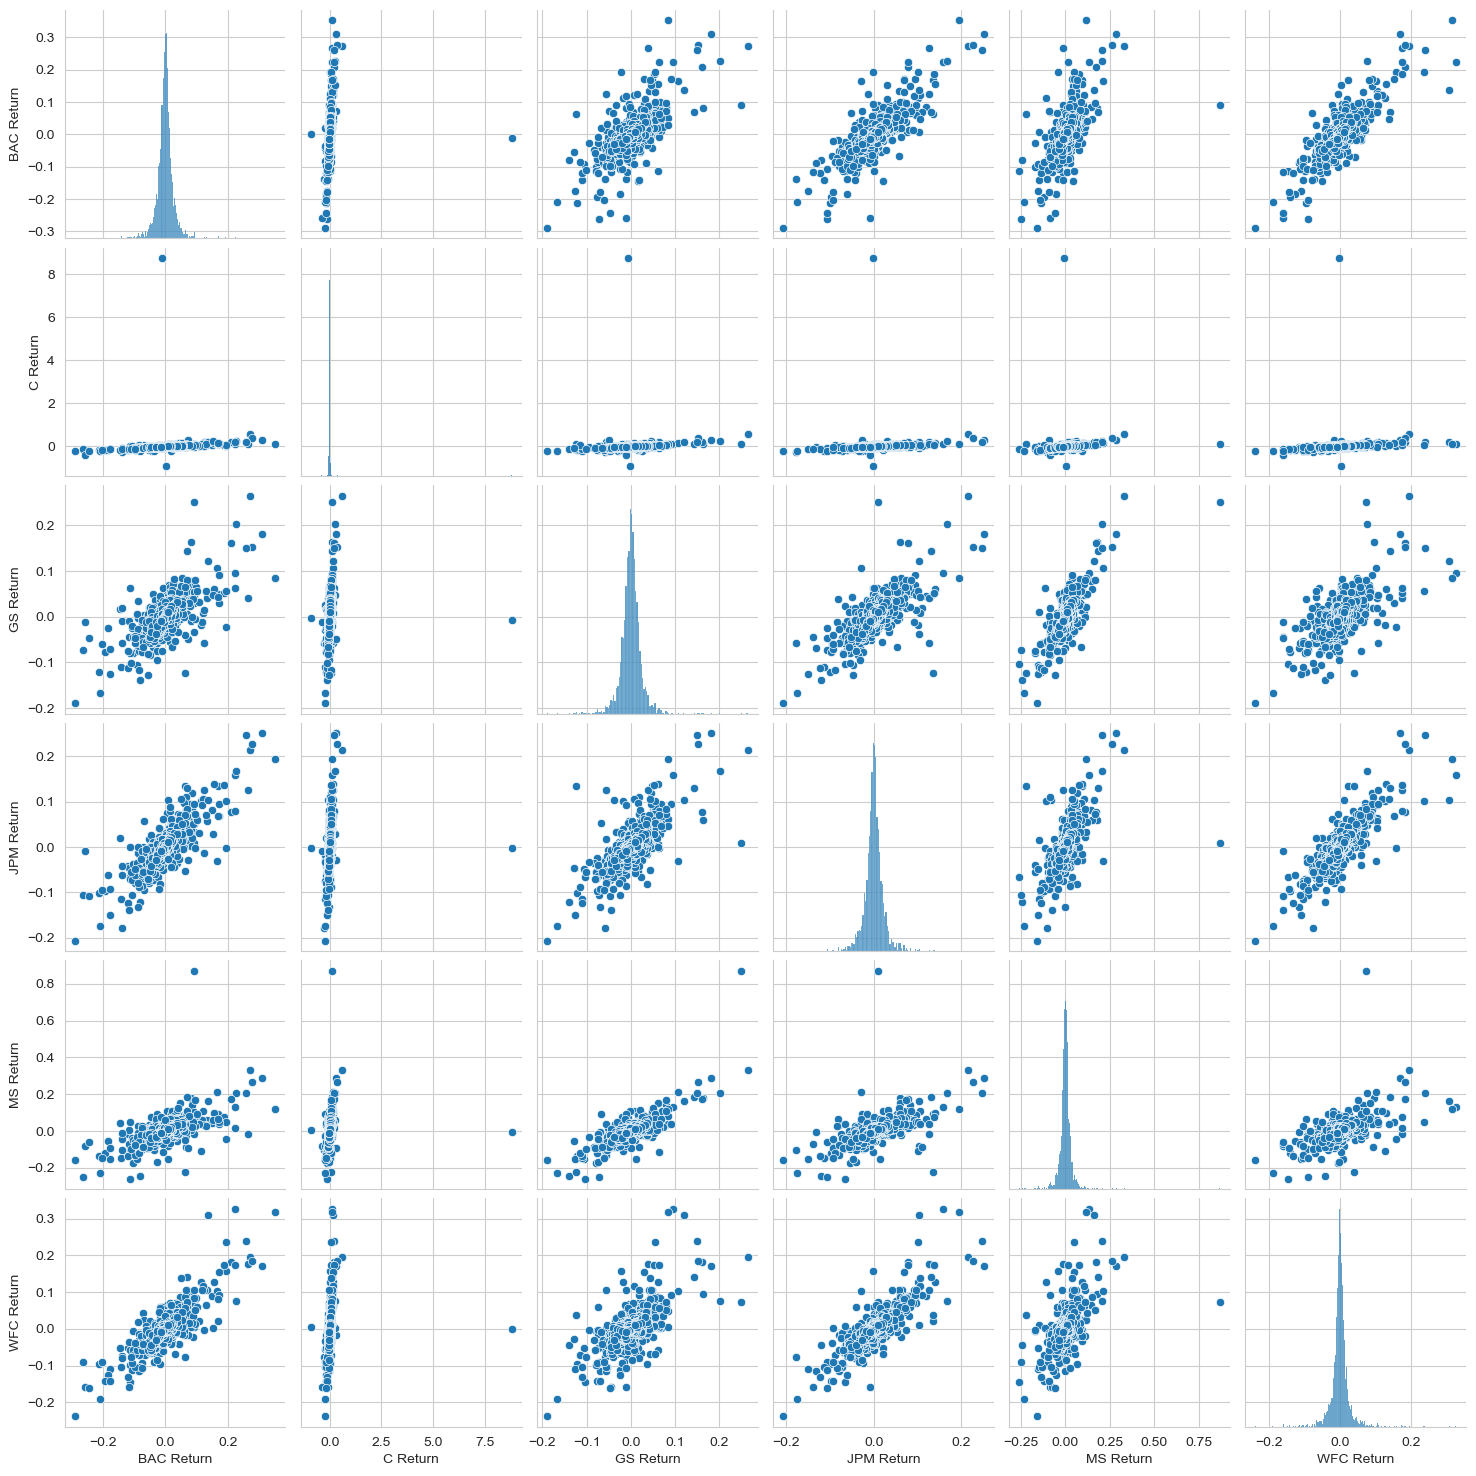

In [ ]:
import seaborn as sns
sns.set_style('whitegrid')
sns.pairplot(data = returns[1:]);

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [12]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* Citigroup had a stock split

In [13]:
# Best Single Day Gain
# citigroup stock split in May 2011, but also JPM day after inauguration.
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [14]:
# which stock would you classify as the riskiest over the entire time period?

returns.std() # Citigroup riskiest-- As higher the standard deviation, it means larger the volatility == riskiest

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

In [15]:
#Which would you classify as the riskiest for the year 2015?

returns.loc['2015-01-01':'2015-12-31'].std() # Very similar risk profiles, but Morgan Stanley or BofA

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

In [16]:
#Filter returns dataFrame for MS

ms_returns_2015 = returns.loc['2015-01-01':'2015-12-31'][['MS Return']]
ms_returns_2015

,MS Return
Date,
2015-01-02,-0.002320
2015-01-05,-0.031258
2015-01-06,-0.028800
2015-01-07,0.014278
2015-01-08,0.014889
...,...
2015-12-24,-0.003681
2015-12-28,-0.009544
2015-12-29,0.011812


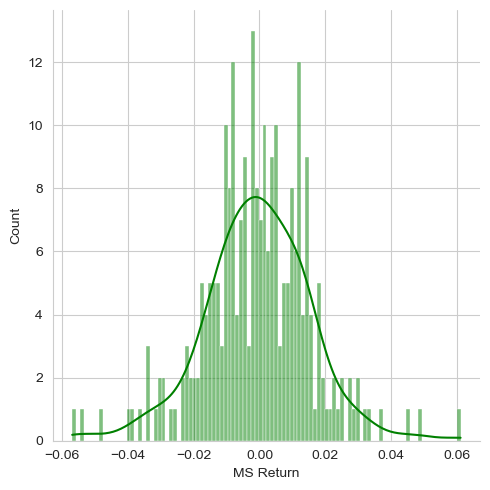

In [17]:
#Create distplot for 2015 returns of MS

import seaborn as sns
#sns.set_stype('whitegrid')
#sns.displot(data = ms_returns_2015,bins = 100,color = 'green',kde = True )
sns.displot(data = returns.loc['2015-01-01':'2015-12-31']['MS Return'],color = 'green', bins = 100,kde = True)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

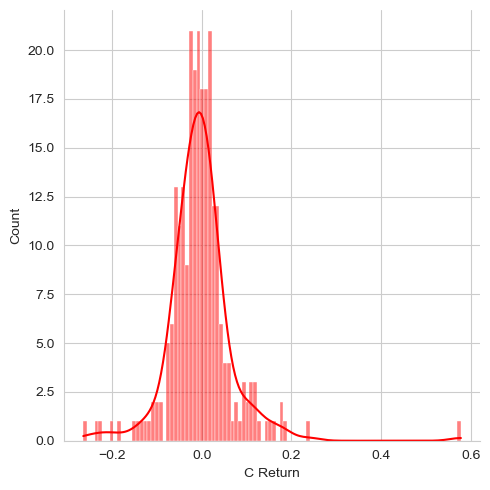

In [18]:
#Filter the returns dataFrame & plot a distplot in a single step

sns.displot(data = returns.loc['2008-01-01':'2008-12-31']['C Return'], color = 'red', bins = 100,kde = True)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
#import cufflinks as cf
#cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

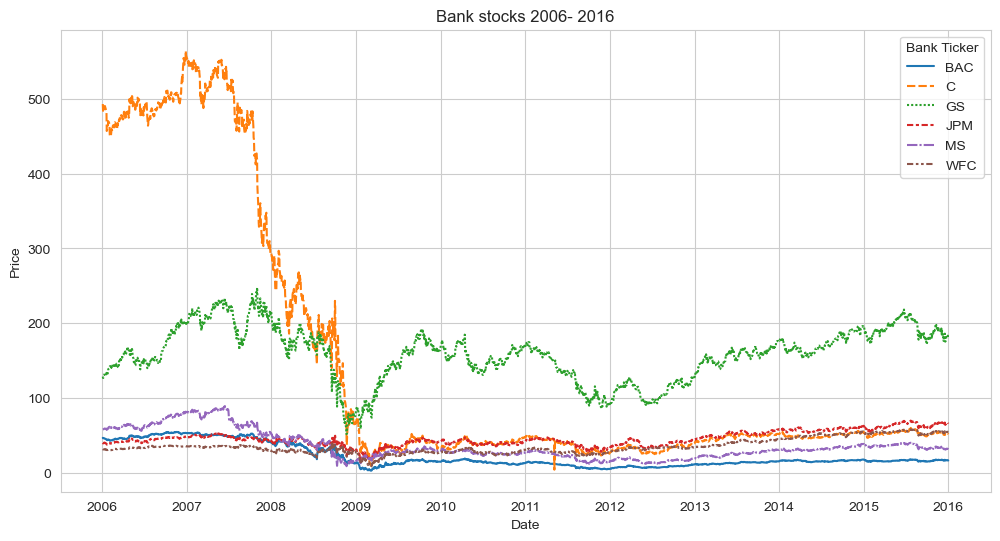

In [20]:
plt.figure(figsize= (12,6))
sns.lineplot(data= bank_stocks.xs(key = 'Close', axis = 1, level= 'Stock Info'))
plt.title('Bank stocks 2006- 2016')
plt.ylabel('Price');

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

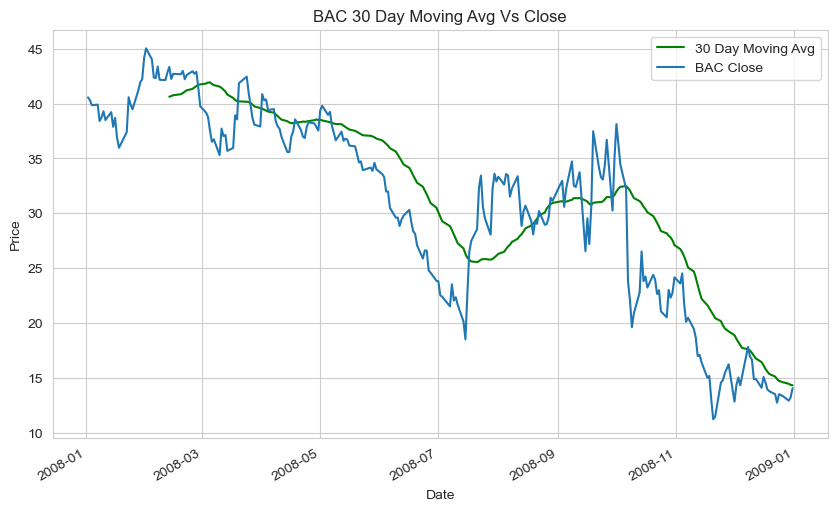

In [21]:
plt.figure(figsize=(10,6))
(bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info')
 .loc['2008-01-01':'2008-12-31', 'BAC'].rolling(window = 30)
 .mean().plot(label = '30 Day Moving Avg', color = 'green'))

(bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info')
     .loc['2008-01-01':'2008-12-31', 'BAC']
     .plot(label = 'BAC Close'))
plt.legend()
plt.ylabel('Price')
plt.title('BAC 30 Day Moving Avg Vs Close');


** Plot the rolling 30 day average against the Close Price for Citi's stock for the year 2008**

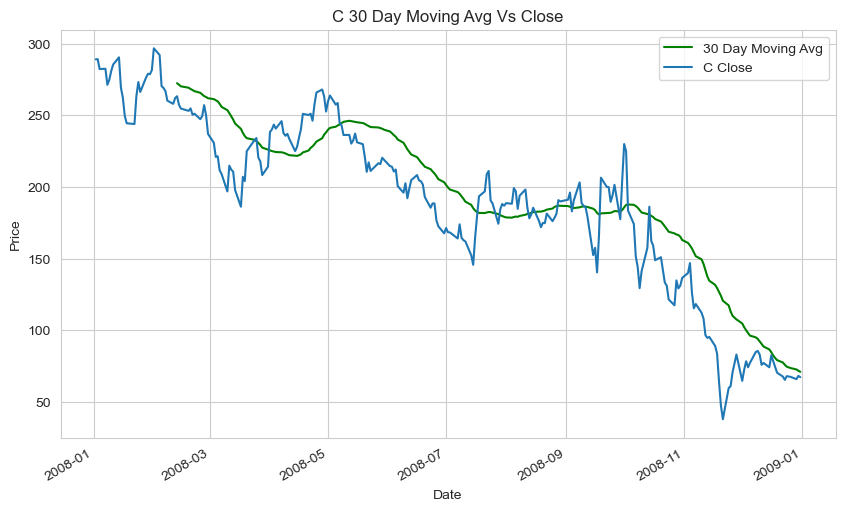

In [24]:
plt.figure(figsize=(10,6))
(bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info')
 .loc['2008-01-01':'2008-12-31', 'C'].rolling(window = 30)
 .mean().plot(label = '30 Day Moving Avg', color = 'green'))

(bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info')
     .loc['2008-01-01':'2008-12-31', 'C']
     .plot(label = 'C Close'))
plt.legend()
plt.ylabel('Price')
plt.title('C 30 Day Moving Avg Vs Close');

** Create a heatmap of the correlation between the stocks Close Price.**

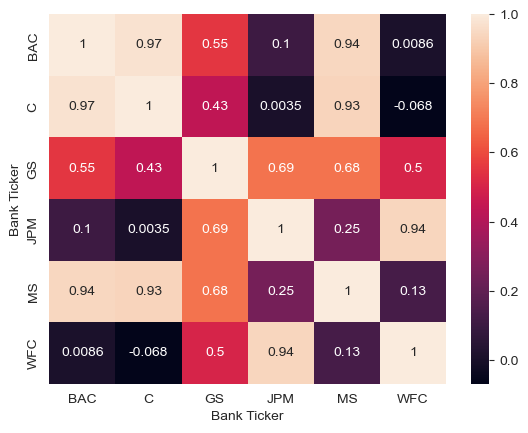

In [22]:
sns.heatmap(data = bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').corr(),annot = True);

** Optional: Use seaborn's clustermap to cluster the correlations together:**

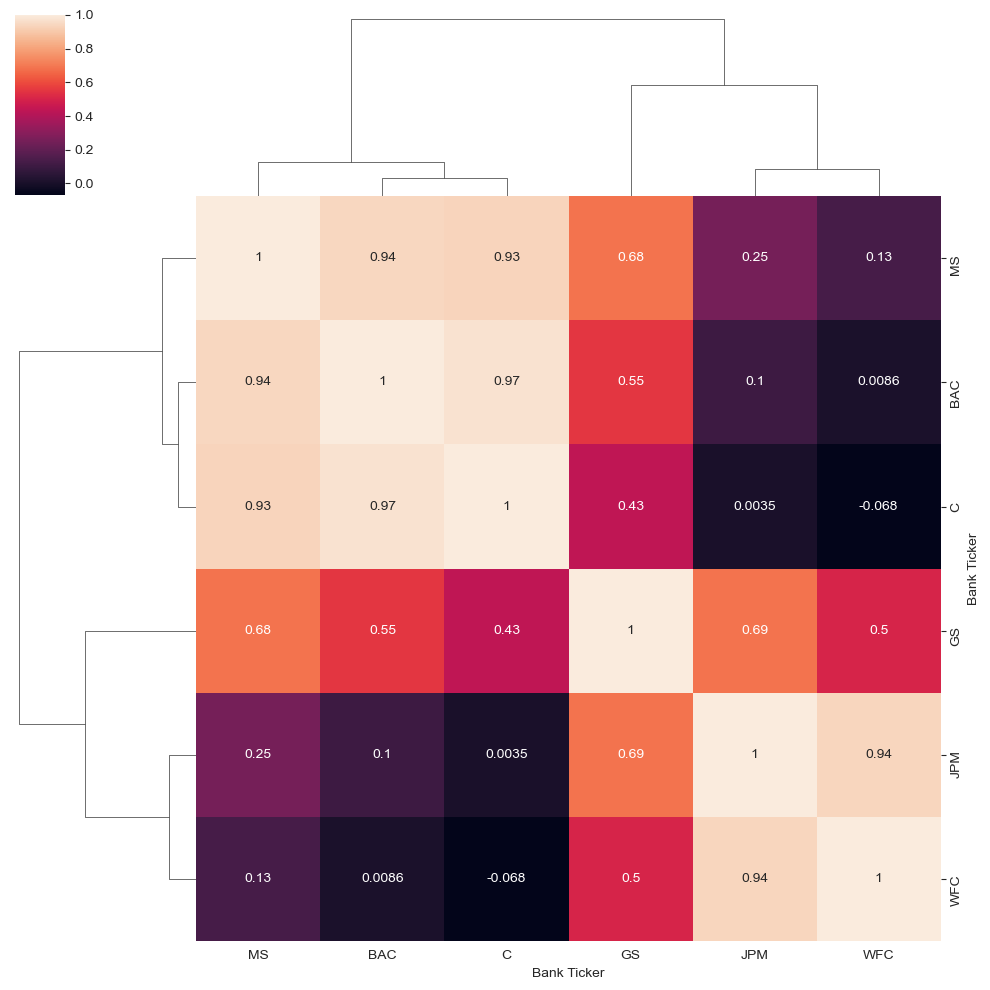

In [23]:
sns.clustermap(data = bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').corr(),annot = True)

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [ ]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

In [36]:
import cufflinks as cf
cf.go_offline()

In [39]:
#Filter the bank_stocks dataframe & plot

bank_stocks.loc['2015-01-01':'2016-01-01','BAC'][['Open', 'High', 'Low', 'Close']].iplot(kind = 'candle')


#** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [44]:
bank_stocks.loc['2015-01-01':'2015-12-31','C'][['Close']].ta_plot(study = 'sma',periods=[13,21,55],title='Simple Moving Averages')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [46]:
bank_stocks.loc['2015-01-01':'2015-12-31','BAC'][['Close']].ta_plot(study = 'boll')